# **Introduction**
In this notebook, customer segmentation was done using the sales data of an international gaming company, and a revenue prediction model was created using demographic characteristics as inputs.

![](https://storage.googleapis.com/pod_public/1300/121065.jpg)


 # **Business Case**
 A gaming company wants to create level-based new customer definitions (persona) using some characteristics of its customers and by creating new segments according to these new customer definitions, the company wants to estimate how much yield on average, possible new customers can made.
 ### For Example
 The company wants to determine how much an IOS user, 25 years old male, from Turkey can potentially generate on average.
 


 # 1) Importing necessary libraries and settings

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.width", 1000)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/persona/persona.csv


### Datasets Story
The Persona.csv data set contains the prices of products sold by an international gaming company and some demographic information of users who purchased these products. The data set consists of records generated in each sales transaction. This means that the table is not grouped. In other words, a user with certain demographic characteristics may have made multiple purchases.

-Price: The amount of money spent by the customer  
-Source: The type of device the customer is connected to  
-Sex: The gender of the customer  
-Country: The country of the customer  
-Age: The age of the customer. 

# 2) Reading datasets and understanding datasets

In [2]:
df = pd.read_csv("/kaggle/input/persona/persona.csv")

def check_df(dataframe, head=5):
    """This function will give us basic information about datasets """
    
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Column Names #####################")
    print(dataframe.info())
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(5000, 5)
##################### Column Names #####################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB
None
##################### Types #####################
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object
##################### Head #####################
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
##################### Tail #########

# 3) Project Requirements

In [3]:
def unique_values(column):
    """Gives you number of unique values and their frequencies"""
    
    print(f"The number of unique {column} variable is:", df[column].nunique())
    print(f"Frequency of {column} variable is:  \n", df[column].value_counts())

unique_values("PRICE")
unique_values("SOURCE")
unique_values("COUNTRY")
unique_values("AGE")

The number of unique PRICE variable is: 6
Frequency of PRICE variable is:  
 29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64
The number of unique SOURCE variable is: 2
Frequency of SOURCE variable is:  
 android    2974
ios        2026
Name: SOURCE, dtype: int64
The number of unique COUNTRY variable is: 6
Frequency of COUNTRY variable is:  
 usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64
The number of unique AGE variable is: 46
Frequency of AGE variable is:  
 15    569
16    494
17    450
18    348
19    309
20    264
21    257
22    242
26    216
23    210
25    180
24    173
31    120
27    113
28    109
33     95
35     87
37     70
32     68
42     66
29     63
34     61
30     57
38     42
43     36
50     33
44     29
41     28
36     25
45     24
51     23
40     21
47     20
49     19
46     12
57      8
65      8
59      8
56      7
66      7
52      7
53      6
39      5
54      

In [4]:
df.groupby(["COUNTRY"]).agg({"PRICE":["sum"]}).sort_values(("PRICE", "sum"), ascending = False) # Countries' revenues 

,PRICE
,sum
COUNTRY,
usa,70225
bra,51354
tur,15689
deu,15485
fra,10177
can,7730


In [5]:
df.groupby(["SOURCE"]).agg({"PRICE":["count"]}) # Sales numbers according to SOURCE

,PRICE
,count
SOURCE,
android,2974
ios,2026


In [6]:
df.groupby(["COUNTRY"]).agg({"PRICE":["mean"]}) # Sales value averages according to countries

,PRICE
,mean
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


In [7]:
df.groupby(["SOURCE"]).agg({"PRICE":["mean"]})  # Sales value averages according to SOURCE

,PRICE
,mean
SOURCE,
android,34.174849
ios,34.069102


In [8]:

df.pivot_table("PRICE", "COUNTRY", "SOURCE", aggfunc="mean") # Sales value averages according to SOURCE-PRICE group

SOURCE,android,ios
COUNTRY,,
bra,34.387029,34.222222
can,33.330709,33.951456
deu,33.869888,34.268817
fra,34.312500,32.776224
tur,36.229437,33.272727
usa,33.760357,34.371703


In [9]:
# Sales value averages grouped by COUNTRY, SOURCE, SEX, AGE sorted in a descending order

agg_df = df.groupby(by=["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values(by="PRICE", ascending=False) 
agg_df.head()


,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


In [10]:
agg_df.reset_index(inplace=True) # All the variables here are indexes except than PRICE column, so we want to make them variables
agg_df.head()


,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


In [11]:
agg_df["AGE"].value_counts()

15    22
16    21
17    19
19    15
21    15
18    15
24    14
26    14
20    14
23    14
25    14
22    13
31    11
27    11
32     9
28     9
34     8
30     8
42     8
33     8
29     8
35     7
37     7
38     6
36     6
47     5
51     4
49     4
41     4
44     4
43     4
46     3
50     3
40     2
56     2
55     2
59     2
45     2
65     2
53     2
57     2
39     1
61     1
52     1
54     1
66     1
Name: AGE, dtype: int64

There were so many unique AGE variables so we had to group them in proper age intervals to analyze the data. Here, proper is the keyword, we need to talk to the company to understand proper age intervals, because it can differ according to companies main focus.

In [12]:


agg_df["AGE2"] = pd.cut(df["AGE"], [0, 18, 23, 30, 40, 70], labels=["0_18", "19_23",'24_30','31_40', '41_70']) 
agg_df["AGE2"].value_counts()



0_18     161
19_23     70
24_30     46
31_40     43
41_70     28
Name: AGE2, dtype: int64

We must create a new variable called customer_level_based to combine all categorical variables in the datasets

In [13]:
# Rather than the code below, we can create a general code that can be used in any datasets
agg_df["CUSTOMER_LEVEL_BASED"] = [agg_df["COUNTRY"][i].upper() + "_" + agg_df["SOURCE"][i].upper() + "_" + agg_df["SEX"][i] + "_" + agg_df["AGE2"][i] for i in agg_df.index]

agg_df["CUSTOMER_LEVEL_BASED"]


0        BRA_ANDROID_male_0_18
1        USA_ANDROID_male_0_18
2      FRA_ANDROID_female_0_18
3            USA_IOS_male_0_18
4      DEU_ANDROID_female_0_18
                ...           
343        USA_IOS_female_0_18
344        USA_IOS_female_0_18
345    CAN_ANDROID_female_0_18
346      FRA_ANDROID_male_0_18
347      DEU_ANDROID_male_0_18
Name: CUSTOMER_LEVEL_BASED, Length: 348, dtype: object

We need to group the repetitive values in customer_level_based. For example there are "USA_IOS_FEMALE" more than 1, so we have to group them according their income mean to have one unique variable

In [14]:
agg_df2 = agg_df.groupby("CUSTOMER_LEVEL_BASED").agg({"PRICE": "mean"})
agg_df2.reset_index(inplace = True)
agg_df2


,CUSTOMER_LEVEL_BASED,PRICE
0,BRA_ANDROID_female_0_18,35.747624
1,BRA_ANDROID_female_19_23,34.398997
2,BRA_ANDROID_female_24_30,34.571429
3,BRA_ANDROID_female_31_40,30.875000
4,BRA_ANDROID_female_41_70,36.682540
...,...,...
94,USA_IOS_male_0_18,38.239720
95,USA_IOS_male_19_23,33.504596
96,USA_IOS_male_24_30,37.623188
97,USA_IOS_male_31_40,30.428571


Since there are so many unique price values we also need to group them by their price to segments A,B,C,D (A: highest income returns). If you dont have insight about variable itself, qcut functions can save the day.

In [15]:

agg_df2["SEGMENT"] = pd.qcut(agg_df2["PRICE"], 4, labels =["D", "C", "B", "A"])
agg_df2["SEGMENT"].value_counts()

D    25
C    25
A    25
B    24
Name: SEGMENT, dtype: int64

In [16]:
agg_df2.groupby("SEGMENT").agg(["mean","count"]).sort_values("SEGMENT", ascending=False)





PRICE      
              mean count
SEGMENT                 
A        38.520119    25
B        35.355603    24
C        33.019383    25
D        30.501161    25

The table above shows us how these segment differs from each other. if a customer is in segment A we can say that on average it will generate 38.5$ income

<function matplotlib.pyplot.show(close=None, block=None)>

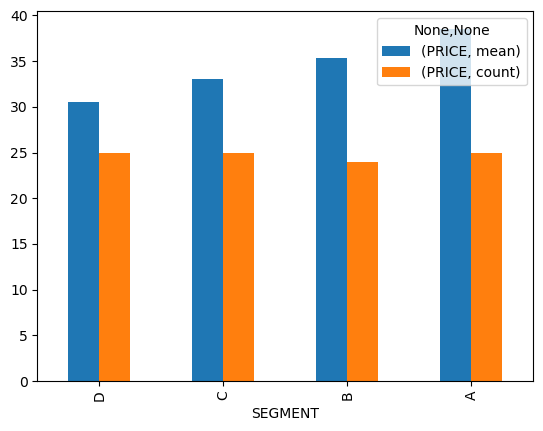

In [17]:
agg_df2.groupby("SEGMENT").agg(["mean","count"]).plot(kind="bar")
plt.show

# Question 1) "What segment does a 33-year-old Turkish woman using Android belong to and how much revenue is she expected to generate on average?

In [18]:
agg_df2.loc[agg_df2["CUSTOMER_LEVEL_BASED"] == "TUR_ANDROID_female_31_40"]

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
65,TUR_ANDROID_female_31_40,31.0,D


# Question 2) What segment does a 35-year-old French woman using iOS belong to and how much revenue is she expected to generate on average?

In [19]:
agg_df2.loc[agg_df2["CUSTOMER_LEVEL_BASED"] =="FRA_IOS_female_31_40"]

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
57,FRA_IOS_female_31_40,33.0,C


# Question 3) Which customer group features most likely to bring the highest revenue in Segment A?

In [20]:
agg_df2.loc[agg_df2["SEGMENT"] =="A"].sort_values("PRICE",ascending=False).head()

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
64,TUR_ANDROID_female_24_30,43.000000,A
69,TUR_ANDROID_male_24_30,42.333333,A
36,DEU_ANDROID_male_19_23,41.727273,A
46,FRA_ANDROID_female_0_18,41.305901,A
43,DEU_IOS_male_24_30,39.000000,A




### Thank you for your suggestions and comments :)
### My linkedin profile: https://www.linkedin.com/in/sefercan-apaydin/
### My Github profile: https://github.com/sefercanapaydin

References:  https://www.miuul.com/